# Quantum Fidelity

The fidelity $F$ or the infidelity $I=1-F$ is a measure of a quantum channels
accuracy. Lets have another look at the previous example:

In [1]:
import numpy as np

from qopt.matrix import DenseOperator
from qopt.solver_algorithms import SchroedingerSolver

sigma_x = DenseOperator.pauli_x()
sigma_y = DenseOperator.pauli_y()
sigma_z = DenseOperator.pauli_z()
zero_matrix = DenseOperator(np.asarray([[0, 0], [0, 0]]))

delta_omega = 0

h_ctrl = [.5 * sigma_x, .5 * sigma_y]
h_drift = [delta_omega * .5 * sigma_z]

n_time_steps = 5
total_time = 1

time_steps = (total_time / n_time_steps) * np.ones((n_time_steps, ))

control_amplitudes = np.zeros((n_time_steps, len(h_ctrl)))
control_amplitudes[:, 0] = np.pi

solver = SchroedingerSolver(
    h_drift=h_drift,
    h_ctrl=h_ctrl,
    tau=time_steps
)
solver.set_optimization_parameters(control_amplitudes)

Remember that this pulse implements an $X_\pi$-rotation around the x-axis.
We can now set up the entanglement fidelity of this solver with the
$X_\pi$-Rotation as target. The entanglement infidelity $I_e$ between a quantum
channel described by a unitary evolution $U$ and a target evolution $V$ can be
calculated as Hilbert-Schmidt vector product:
\begin{equation}
I_e = 1 - \frac{1}{d^2}\vert \text{tr}\left( V^\dagger U \right)|^2
\end{equation}

In [5]:
from qopt.cost_functions import OperationInfidelity


entanglement_infidelity = OperationInfidelity(
    solver=solver,
    target=sigma_x
)

print("The entanglement infidelity " +  str(entanglement_infidelity.costs())
      + " is 0 within the computational accuracy. ")

The entanglement infidelity -8.881784197001252e-16is 0 within the computational accuracy. 


Lets see what happens if we change the pulse to a $X_{\pi/2}$-gate, as we
halve the control amplitude value.

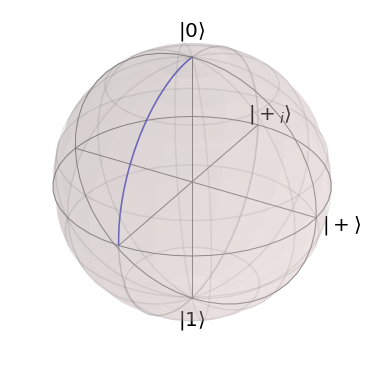

In [6]:
solver.set_optimization_parameters(.5 * control_amplitudes)
solver.plot_bloch_sphere()

We can verify that the system now does only a rotation of $\pi / 2$ with
the bloch sphere plot.

In [7]:
print("New enganglement fidelity: " + str(entanglement_infidelity.costs()))

New enganglement fidelity: 0.5000000000000002
